# Carbon Intensity of various foodstuffs

visualizing data from [Poore, J. & Nemecek, T. (2018). Reducing food’s environmental impacts through producers and consumers. Science.](http://science.sciencemag.org/cgi/content/full/360/6392/987?ijkey=ffyeW1F0oSl6k&keytype=ref&siteid=sci)

This paper on the environmental impact of various foodstuffs was covered by various media.  The data from the study were replotted in various ways:

- By the BBC ([original article](https://www.bbc.co.uk/news/science-environment-46459714)):

![BBC Graphic](bbc-poorenemecekfoodcintensity.png)

When I saw the BBC Graphic, I noticed that the average to high impace beef occupies more than half of the $x$-axis, so I soon thought it would be interesting to try to plot a version of this graphic with a logarthmic scale...

- By the Guardian ([original article](https://www.theguardian.com/environment/2018/may/31/avoiding-meat-and-dairy-is-single-biggest-way-to-reduce-your-impact-on-earth)):

![Guardian Graphic](guardian-poorenemecekfoodcintensity.png)

When I saw the Guardian graphic, I was confused by how the scales could be so different.  Could the Guardian's "100 g of meat", giving rise to over 100 kg of greenhouse gas emissions, be that different from the BBC's "serving", giving rise to aroung 15 kg of gas?


Fortunately the data behind the study are available under open access

- [Data in spreadsheet format](https://science.sciencemag.org/highwire/filestream/710905/field_highwire_adjunct_files/3/aaq0216_DataS2.xls)
- [Full model](https://ora.ox.ac.uk/objects/uuid:a63fb28c-98f8-4313-add6-e9eca99320a5)

Looking at the data spreadsheet, I could see where the Guardian numbers were from: the tab labelled "Results - Nutritional Units" in the DataS2 spreadsheet.

However, the Guardian graphic is misleading: 
- It's not per 100 g of meat, it's per 100 g of protein (which is around 180 g of meat)
- The $x$-axis doesn't have units

I couldn't work out what the BBC have done to the study data to get the numbers plotted on their graph; they seem to have applied portion-size multipliers in an opaque way to the data (which *might* be a good way of presenting the data: I just don't have the information to tell).  It still suffers from the problem that only the top six or so products are distiguishable and comparable on the graph - the others just appear as "low impact".

So, I decided to have a go at replotting the study data.  To enable the wide range of impacts to fit onto one graph, I decided to use a logarthmic paper.

The authors get around this in the original paper ([full text of paper](https://science.sciencemag.org/content/360/6392/987)) by using several different scales (the greenhouse gas emissions are in the left hand column):

![Poore and Nemecek plot](F1.large.jpg)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

Firstly I created a csv file with just the Product label, 10th and 90th percentile and mean data for Greenhouse Gas (GHG) emissions (kg CO$_2$eq) per "Nutritional Unit" (i.e. I have gone with the Guardian's choice of data, also the one used in the graphic in the paper)

In [2]:
import pandas as pd

intensity_df = pd.read_csv("cintensitypernu.csv")

print(intensity_df.head(5))

                    Product  10th pctl  Mean  90th pctl
0   Bovine Meat (beef herd)       20.0  50.0      105.0
1  Bovine Meat (dairy herd)        9.1  17.0       26.0
2             Lamb & Mutton       12.0  20.0       27.0
3      Crustaceans (farmed)        5.4  18.0       35.0
4                    Cheese        4.9  11.0       18.0


To emphasize that things over on the left really do have *much lower* carbon footprints than the few instances which extend over onto the right, the bars are coloured by their mean value, on a linear colour map, thus accounting for any risk of misinterpretation caused by the logarithmic plot.

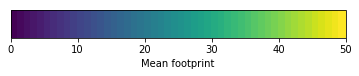

In [3]:
from matplotlib import cm, colorbar
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

viridis = cm.get_cmap('viridis', 50)

#cmap = mpl.cm.cool
norm = Normalize(vmin=0, vmax=50)

cb1 = colorbar.ColorbarBase(ax, cmap=viridis,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Mean footprint')
plt.show()

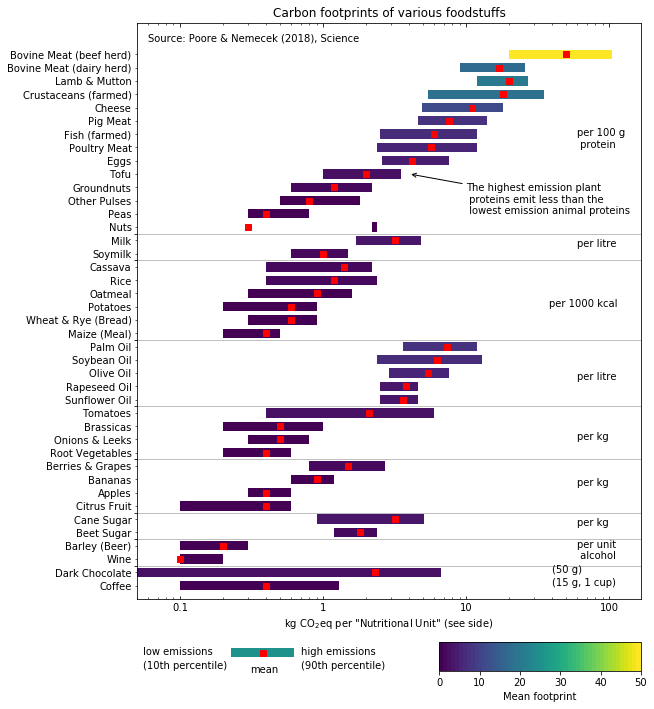

In [4]:
fig = plt.figure(figsize=(7,10))

ax = fig.add_axes([0, 0.1, 1, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0, 0.4, 0.04]) # inset axes for colourmap
ax3 = fig.add_axes([0,0,0.5,0.05])

#intensity_df.plot(kind='barh',x='Product',y='Mean',position=0.2)

ind = np.arange(len(intensity_df['Mean'].values)) 

import matplotlib.ticker as ticker #for number log axes



viridis = cm.get_cmap('viridis', 50)
#print(viridis)

# Plotting the data
ax.barh(ind, intensity_df['90th pctl'].values-intensity_df['10th pctl'].values, 
        height=0.7, left=intensity_df['10th pctl'].values,log=True,color=viridis(intensity_df['Mean'].values/50))
ax.plot(intensity_df['Mean'].values, ind, 'rs')
ax.set_xlim(left=0.05) #left hand end of scale adjustment

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylim(bottom=41) #bottom end of scale adjustment NB this *is* the bottom

# Dividing into categories
ax.set_yticks([13.5, 15.5, 21.5,26.5,30.5,34.5,36.5,38.5], minor=False)
ax.yaxis.grid(True, which='major')

ax.set_yticks(ind,minor=True) #get every label for products
ax.set_yticklabels(intensity_df['Product'],minor=True)
ax.set_yticklabels([],minor=False) #but not for the category divisions!


ax.tick_params(axis='x',direction='in',which='both')
ax.xaxis.set_ticks_position('both') # ticks at top and bottom

# Get x axis labels as numbers rather than exponents
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(x),0)))).format(x)))
#plt.grid(b=True, which='major', axis='x') # vertical gridlines

#Labels
ax.set_xlabel(r'kg CO$_2$eq per "Nutritional Unit" (see side)')
ax.set_title('Carbon footprints of various foodstuffs')
ax.text(0.06, -1, 'Source: Poore & Nemecek (2018), Science') #data attribution
ax.text(60, 7, 'per 100 g\n protein')
ax.text(60, 14.5, 'per litre')
ax.text(38, 19, 'per 1000 kcal')
ax.text(60, 24.5, 'per litre')
ax.text(60, 29, 'per kg')
ax.text(60, 32.5, 'per kg')
ax.text(60, 35.5, 'per kg')
ax.text(60, 38, 'per unit\n alcohol')
ax.text(40, 39, '(50 g)')
ax.text(40, 40, '(15 g, 1 cup)')
ax.annotate('The highest emission plant\n proteins emit less than the\n \
lowest emission animal proteins', xy=(4, 9), xytext=(10, 12), arrowprops=dict(arrowstyle="->"))

norm = Normalize(vmin=0, vmax=50)

cb1 = colorbar.ColorbarBase(ax2, cmap=viridis,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Mean footprint')

ax3.barh(1, 0.5, height=0.25, left=0.75,color=viridis(0.5))
ax3.plot(1, 1, 'rs')
plt.xlim(left=0,right=2) 
plt.ylim(top=1.5,bottom=0.5) 
plt.axis('off')
ax3.text(0.05, 0.95, 'low emissions')
ax3.text(1.3, 0.95, 'high emissions')
ax3.text(0.05, 0.55, '(10th percentile)')
ax3.text(1.3, 0.55, '(90th percentile)')
ax3.text(0.9, 0.45, 'mean')

plt.savefig("foodstuffcarbonfootprints-3.png", bbox_inches='tight', pad_inches=0.1)

plt.show()

Key features:
- sticking closely to the presentation followed in the study, but just focusing on CO$_2$ emissions like the news media
- making sure that it's clear what the "nutritional units" are in each case
- using a logaritmic $x$-axis to allow all of the data to be plotted on a single graph and comparisons made between products with wildly different carbon intensities
- overcoming the distorting effect of the logarithmic scale by use of a linear colour map

In [5]:
%load_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.1 32bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 3.2.98 smp i686 Intel R _Pentium R _4_CPU_2.40GHz with slackware 14.0
numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0
Sun Jun 02 08:17:49 2019 GMT